In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.utils import resample, shuffle
import seaborn as sns


# Setting  up seeds for the model and data splitting randomnes for reproducibility and consistency
np.random.seed(42)
random_state=42

# Read data from file
dataTrain = pd.read_csv('train.csv')


dataTrain.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [ ]:
# Read data from file

dataTest = pd.read_csv('test.csv')

dataTest.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
5,5,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,...,5,4,3,1,1,2,5,0,0.0,satisfied
6,6,79433,Female,Loyal Customer,77,Business travel,Business,3987,5,5,...,5,5,5,5,4,5,3,0,0.0,satisfied
7,7,97286,Female,Loyal Customer,43,Business travel,Business,2556,2,2,...,4,4,4,4,5,4,3,77,65.0,satisfied
8,8,27508,Male,Loyal Customer,47,Business travel,Eco,556,5,2,...,5,2,2,5,3,3,5,1,0.0,satisfied
9,9,62482,Female,Loyal Customer,46,Business travel,Business,1744,2,2,...,4,4,4,4,5,4,4,28,14.0,satisfied


In [ ]:
import numpy as np
import pandas as pd

def clean_dataset(df, name="Data", columns=None, inplace=False):
    """
    Cleans a DataFrame by:
    - Converting empty strings or spaces to NaN
    - Dropping rows with any NaN (or only in specific columns)

    Args:
        df (pd.DataFrame): Your dataset
        name (str): Name for reporting
        columns (list): If specified, drops rows only if NaN in these columns
        inplace (bool): If True, modifies df in place

    Returns:
        Cleaned DataFrame
    """
    if not inplace:
        df = df.copy()

    # Step 1: Replace blank strings or spaces with real NaN
    df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

    # Step 2: Count before
    before = df.shape[0]

    # Step 3: Drop rows with NaN in general or in specific columns
    if columns:
        df.dropna(subset=columns, inplace=True)
    else:
        df.dropna(inplace=True)

    # Step 4: Count after
    after = df.shape[0]
    removed = before - after

    print(f"{name}: Removed {removed} row(s) with missing or blank fields.")
    return df

dataTrain = clean_dataset(dataTrain, name="dataTrain")
dataTest = clean_dataset(dataTest, name="dataTest")

dataTrain = dataTrain.drop(columns=['Unnamed: 0', 'id'])
dataTest = dataTest.drop(columns=['Unnamed: 0', 'id'])


dataTrain: Removed 310 row(s) with missing or blank fields.
dataTest: Removed 83 row(s) with missing or blank fields.


satisfaction
neutral or dissatisfied    58697
satisfied                  44897
Name: count, dtype: int64


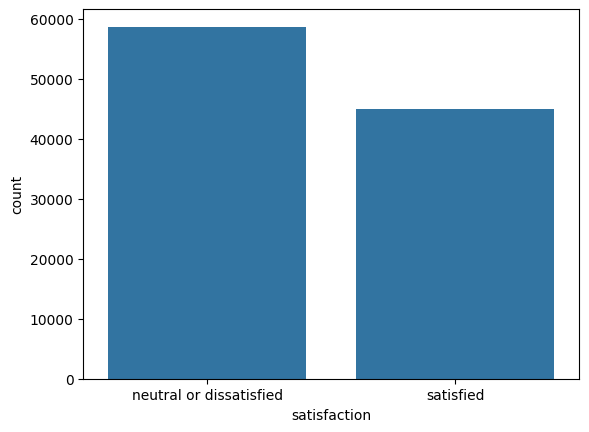

In [ ]:

# For training set
sns.countplot(x='satisfaction', data=dataTrain)
print(dataTrain['satisfaction'].value_counts())



satisfaction
neutral or dissatisfied    14528
satisfied                  11365
Name: count, dtype: int64


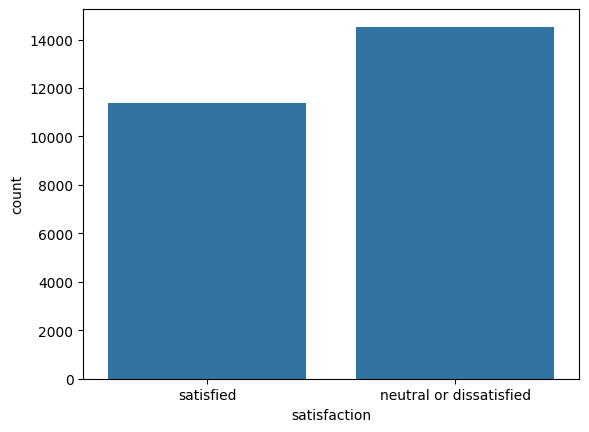

In [ ]:
# For test set
sns.countplot(x='satisfaction', data=dataTest)
print(dataTest['satisfaction'].value_counts())


In [ ]:
print(dataTrain.columns)

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')


In [ ]:

hot_encoded_columns = ['Class']
dataTrain = pd.get_dummies(dataTrain, columns=hot_encoded_columns, drop_first=True, dtype=int)
dataTest = pd.get_dummies(dataTest, columns=hot_encoded_columns, drop_first=True, dtype=int)

# Since the following are simply binary categories, transforming them to 0 and 1 (adjust according to your dataset)
label_encoded_columns = ['Gender','Customer Type','Type of Travel']
label_encoders = {}

for col in label_encoded_columns:
    le = LabelEncoder()
    dataTrain[col] = le.fit_transform(dataTrain[col])
    dataTest[col] = le.transform(dataTest[col])  # Use transform on test data
    label_encoders[col] = le

# 999 indicates client was not previously contacted, change to -1 for less variance
#dataTrain.pdays = dataTrain.pdays.replace(999, -1)
#dataTest.pdays = dataTest.pdays.replace(999, -1)

# Set output "no" to 0 and "yes" to 1 (adjust this for the target column in your dataset)
print(dataTrain['satisfaction'].unique())  # Before mapping

# Fix mapping
dataTrain['satisfaction'] = dataTrain['satisfaction'].map({
    'neutral or dissatisfied': 0,
    'satisfied': 1
})

dataTest['satisfaction'] = dataTest['satisfaction'].map({
    'neutral or dissatisfied': 0,
    'satisfied': 1
})

print(dataTrain['satisfaction'].value_counts())  # After mapping


# Show first 10 rows of the train dataset
dataTrain.head(10)


['neutral or dissatisfied' 'satisfied']
satisfaction
0    58697
1    44897
Name: count, dtype: int64


,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class_Eco,Class_Eco Plus
0,1,0,13,1,460,3,4,3,1,5,...,3,4,4,5,5,25,18.0,0,0,1
1,1,1,25,0,235,3,2,3,3,1,...,5,3,1,4,1,1,6.0,0,0,0
2,0,0,26,0,1142,2,2,2,2,5,...,3,4,4,4,5,0,0.0,1,0,0
3,0,0,25,0,562,2,5,5,5,2,...,5,3,1,4,2,11,9.0,0,0,0
4,1,0,61,0,214,3,3,3,3,4,...,4,4,3,3,3,0,0.0,1,0,0
5,0,0,26,1,1180,3,4,2,1,1,...,4,4,4,4,1,0,0.0,0,1,0
6,1,0,47,1,1276,2,4,2,3,2,...,3,4,3,5,2,9,23.0,0,1,0
7,0,0,52,0,2035,4,3,4,4,5,...,5,5,4,5,4,4,0.0,1,0,0
8,0,0,41,0,853,1,2,2,2,4,...,2,1,4,1,2,0,0.0,0,0,0
9,1,1,20,0,1061,3,3,3,4,2,...,3,4,4,3,2,0,0.0,0,1,0


In [ ]:
print(dataTrain.columns)

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Flight Distance',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'Class_Eco', 'Class_Eco Plus'],
      dtype='object')


In [ ]:
X = dataTrain.drop(columns=['satisfaction'])
y = dataTrain['satisfaction']

z = dataTest.drop(columns=['satisfaction'])
y_test = dataTest['satisfaction']

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X, y)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X)
X_test = scaler.transform(z)

'''
#  Min-Max Normalization (Scaling to [0, 1])
min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train_res)
X_test_minmax = min_max_scaler.transform(z)
'''
'''
def decimal_scaling(X):
    max_abs = np.max(np.abs(X), axis=0)
    j = np.ceil(np.log10(max_abs + 1))
    return X / (10 ** j)
    '''



'\ndef decimal_scaling(X):\n    max_abs = np.max(np.abs(X), axis=0)\n    j = np.ceil(np.log10(max_abs + 1))\n    return X / (10 ** j)\n    '

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 44897, number of negative: 58697
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011376 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 103594, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433394 -> initscore=-0.268018
[LightGBM] [Info] Start training from score -0.268018


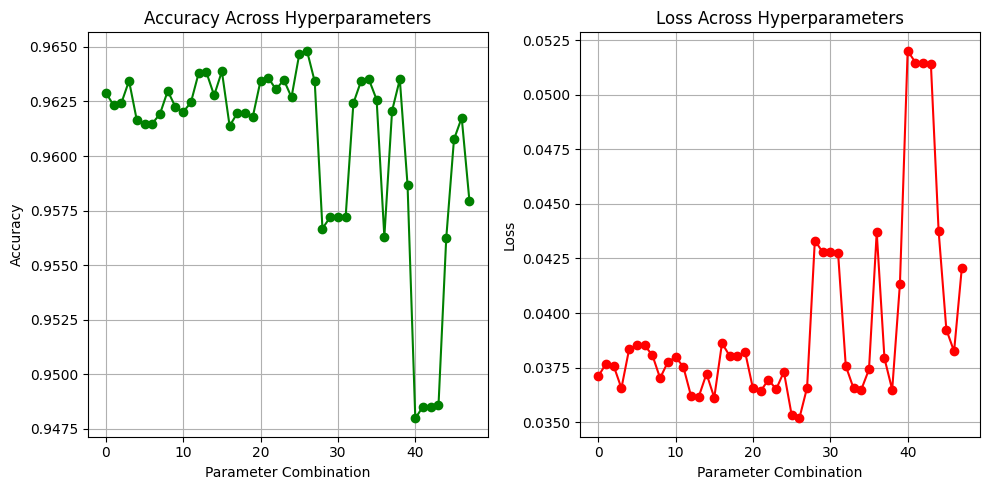

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': -1, 'num_leaves': 100}
Best Accuracy: 0.9648242217057849
Loss for the Best Accuracy: 0.03517577829421514
Top 5 Best Accuracies and Their Hyperparameters:
Accuracy: 0.9648, Hyperparameters: {'learning_rate': 0.1, 'max_depth': -1, 'num_leaves': 100}
Accuracy: 0.9647, Hyperparameters: {'learning_rate': 0.1, 'max_depth': -1, 'num_leaves': 50}
Accuracy: 0.9639, Hyperparameters: {'learning_rate': 0.2, 'max_depth': -1, 'num_leaves': 31}
Accuracy: 0.9638, Hyperparameters: {'learning_rate': 0.2, 'max_depth': -1, 'num_leaves': 50}
Accuracy: 0.9638, Hyperparameters: {'learning_rate': 0.2, 'max_depth': -1, 'num_leaves': 25}


In [ ]:

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import lightgbm as lgb
import matplotlib.pyplot as plt


param_grid = {
    'learning_rate': [0.3, 0.2, 0.1,0.05],
    'num_leaves': [25, 50, 100,31],
    'max_depth': [-1, 5, 10]
}

# Initialize the LightGBM model
lgbm = lgb.LGBMClassifier(objective='binary', metric='binary_logloss', random_state=42)

# Setting up GridSearchCV
grid_search = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit the grid search
grid_search.fit(X_train, y)

# Extract results
results = grid_search.cv_results_
mean_test_scores = results['mean_test_score']  # Accuracy
losses = 1 - mean_test_scores                  # Loss = 1 - Accuracy

# Plotting Accuracy and Loss
plt.figure(figsize=(10, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(range(len(mean_test_scores)), mean_test_scores, marker='o', color='green')
plt.title('Accuracy Across Hyperparameters')
plt.xlabel('Parameter Combination')
plt.ylabel('Accuracy')
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(range(len(losses)), losses, marker='o', color='red')
plt.title('Loss Across Hyperparameters')
plt.xlabel('Parameter Combination')
plt.ylabel('Loss')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print Best Parameters
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Find the index of the best accuracy and get the corresponding loss
best_accuracy_index = mean_test_scores.argmax()  # Get the index of the highest accuracy
best_loss_for_best_accuracy = losses[best_accuracy_index]  # Get the corresponding loss

print("Loss for the Best Accuracy:", best_loss_for_best_accuracy)

# Geting the top 5 accuracy values and their corresponding parameter combinations
top_5_indices = mean_test_scores.argsort()[-5:][::-1]  # Indices of the top 5 accuracies in descending order

print("Top 5 Best Accuracies and Their Hyperparameters:")

for index in top_5_indices:
    print(f"Accuracy: {mean_test_scores[index]:.4f}, Hyperparameters: {results['params'][index]}")


[LightGBM] [Info] Number of positive: 44897, number of negative: 58697
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017051 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 103594, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433394 -> initscore=-0.268018
[LightGBM] [Info] Start training from score -0.268018
Accuracy with LGBM = 0.9680386894993919
[LightGBM] [Info] Number of positive: 44897, number of negative: 58697
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.122850 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 103594, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]:

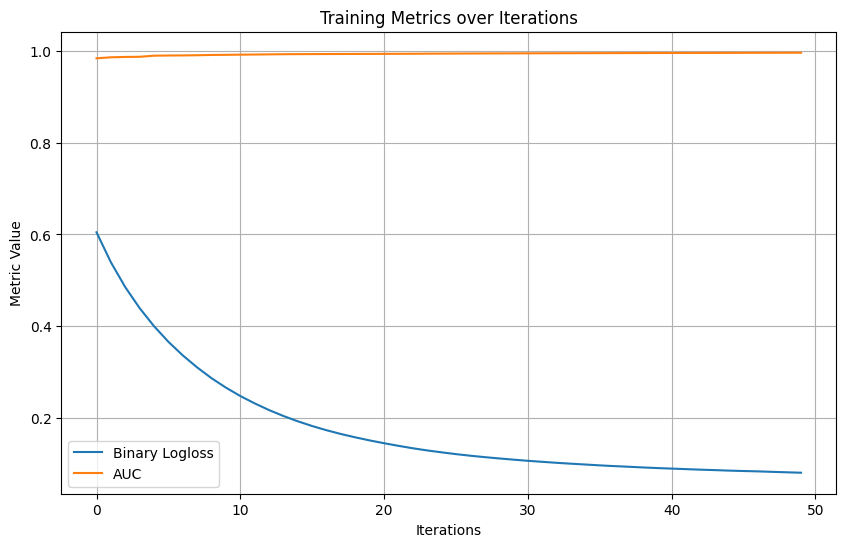

In [14]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from datetime import datetime


d_train = lgb.Dataset(X_train, label=y)


lgbm_params = {
    'learning_rate': 0.1,
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': ['auc', 'binary_logloss'],
    'num_leaves': 100,
    'max_depth': -1
}

# Training the model
start = datetime.now()
clf = lgb.train(lgbm_params, d_train, 50)  # 50 iterations
stop = datetime.now()
execution_time_lgbm = stop - start

# Prediction on test data
y_pred_lgbm = clf.predict(X_train)

# Convert probabilities to binary (0 or 1)
y_pred_lgbm = [1 if prob >= 0.5 else 0 for prob in y_pred_lgbm]

# Printing accuracy
accuracy_lgbm = accuracy_score(y, y_pred_lgbm)
print("Accuracy with LGBM =", accuracy_lgbm)

import matplotlib.pyplot as plt

# Initializing dictionary to record evaluation results
evals_result = {}

# Training the model with evaluation results recorded
clf = lgb.train(
    lgbm_params,
    d_train,
    num_boost_round=50,
    valid_sets=[d_train],
    callbacks=[lgb.record_evaluation(evals_result)]
)

# Ploting training binary_logloss
plt.figure(figsize=(10, 6))
plt.plot(evals_result['training']['binary_logloss'], label='Binary Logloss')
plt.plot(evals_result['training']['auc'], label='AUC')
plt.xlabel('Iterations')
plt.ylabel('Metric Value')
plt.title('Training Metrics over Iterations')
plt.legend()
plt.grid(True)
plt.show()



[LightGBM] [Info] Number of positive: 44897, number of negative: 58697
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 103594, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433394 -> initscore=-0.268018
[LightGBM] [Info] Start training from score -0.268018
Accuracy: 0.9641
Recall: 0.9421
Precision: 0.9752
F1 Score: 0.9584
ROC AUC Score: 0.9950
Binary Log Loss: 0.0886


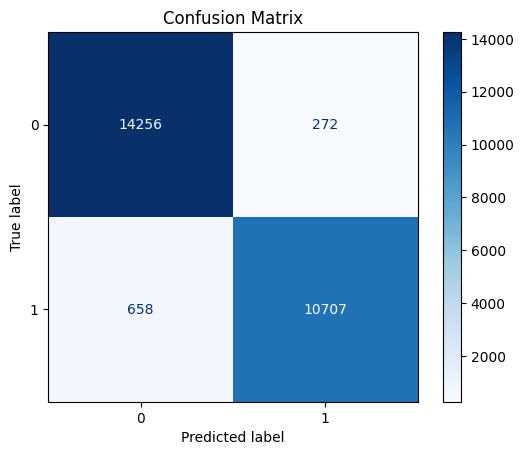

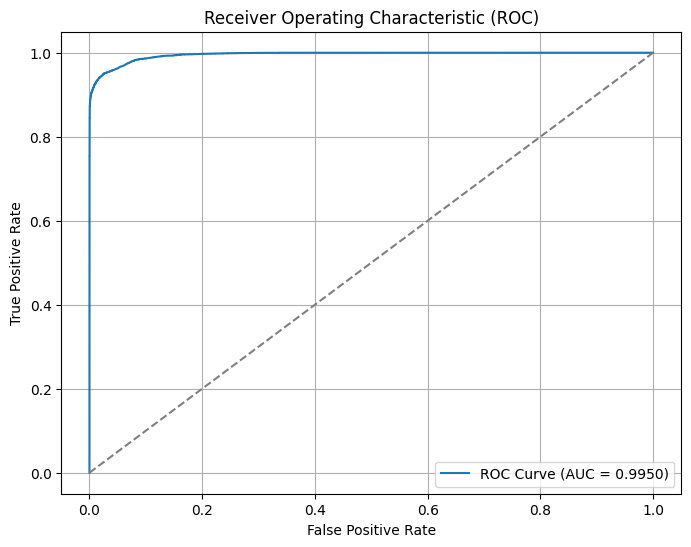

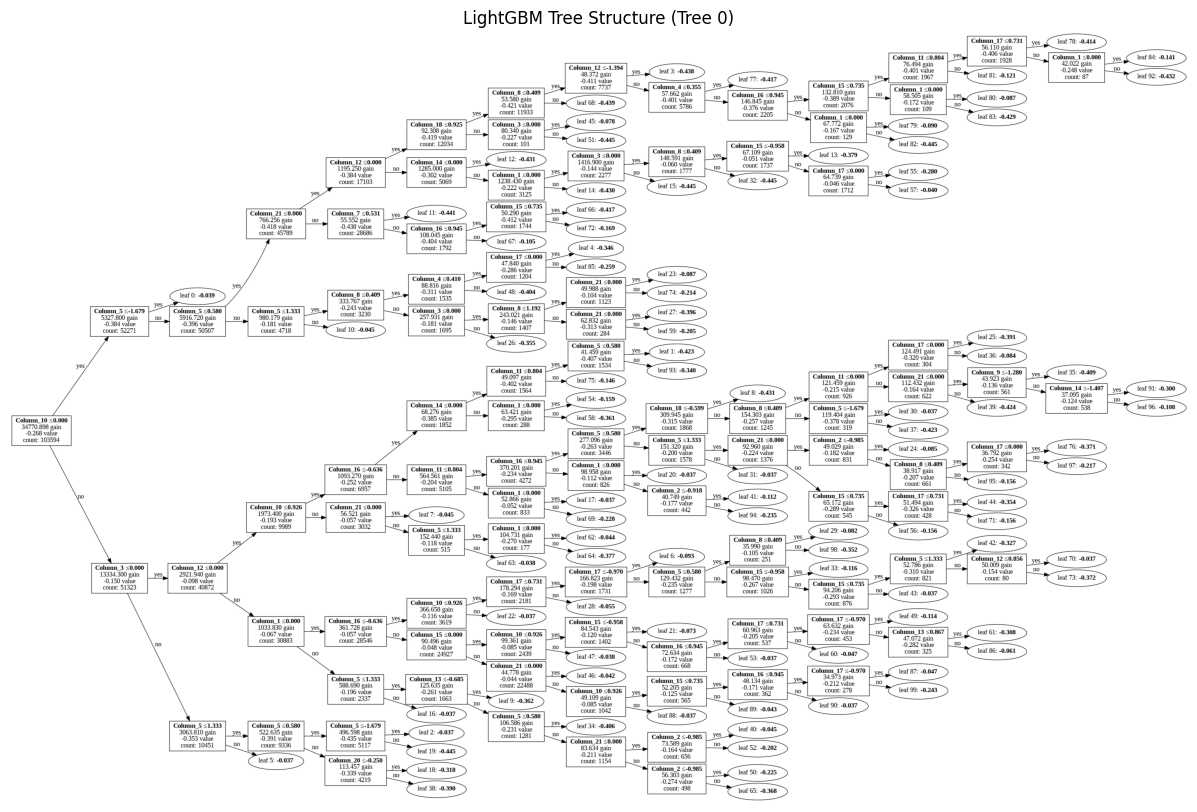

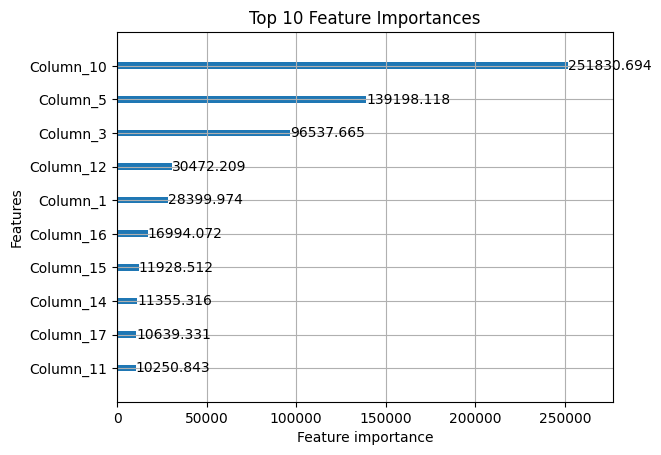

In [16]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve, log_loss, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from datetime import datetime

lgbm_params = {
    'learning_rate': 0.1,
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': ['auc', 'binary_logloss'],
    'num_leaves': 100,
    'max_depth': -1
}

# Creating LightGBM Dataset
d_train = lgb.Dataset(X_train, label=y)
d_test = lgb.Dataset(X_test, label=y_test, reference=d_train)

# Training the model
start = datetime.now()
clf = lgb.train(lgbm_params, d_train, 50)  # 50 iterations
stop = datetime.now()
execution_time_lgbm = stop - start

# Prediction on test data
y_pred_lgbm = clf.predict(X_test)

# Converting probabilities to binary (0 or 1)
y_pred_binary = [1 if prob >= 0.5 else 0 for prob in y_pred_lgbm]

# Accuracy
accuracy_lgbm = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy_lgbm:.4f}")

# Recall
recall_lgbm = recall_score(y_test, y_pred_binary)
print(f"Recall: {recall_lgbm:.4f}")

# Precision
precision_lgbm = precision_score(y_test, y_pred_binary)
print(f"Precision: {precision_lgbm:.4f}")

# F1 Score
f1_lgbm = f1_score(y_test, y_pred_binary)
print(f"F1 Score: {f1_lgbm:.4f}")

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_lgbm)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Binary Log Loss
loss_lgbm = log_loss(y_test, y_pred_lgbm)
print(f"Binary Log Loss: {loss_lgbm:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve Plot
fpr, tpr, _ = roc_curve(y_test, y_pred_lgbm)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Receiver Operating Characteristic (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
# Plot Tree Structure
lgb.plot_tree(clf, tree_index=0, figsize=(20, 10), show_info=['split_gain', 'internal_value', 'internal_count'])
plt.title("LightGBM Tree Structure (Tree 0)")
plt.show()

# Feature Importance Plot
lgb.plot_importance(clf, max_num_features=10, importance_type='gain')
plt.title('Top 10 Feature Importances')
plt.show()
